In [6]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

RUTA_DATOS_FINAL = os.path.join('..', '1_datos', '02_procesados', 'gdf_final_auditado.gpkg')
gdf = gpd.read_file(RUTA_DATOS_FINAL)

print("GeoDataFrame auditado cargado. Iniciando auditoría de la variable 'indice_movilizacion'.")

GeoDataFrame auditado cargado. Iniciando auditoría de la variable 'indice_movilizacion'.


In [7]:
print("--- Estadísticas Descriptivas de 'indice_movilizacion' ---")
display(gdf['indice_movilizacion'].describe())

print("""
--- ¿Cómo interpretar este índice? ---
Recuerda que esta variable NO es un porcentaje. Es un ratio que mide la 'productividad' de votos de una sección a lo largo del tiempo.
Un valor de 45, por ejemplo, significa que en los últimos 12 años, la sección ha generado 45 votos por cada votante registrado en su lista nominal promedio.
Un valor más alto indica una movilización histórica mucho más intensa.
""")

--- Estadísticas Descriptivas de 'indice_movilizacion' ---


KeyError: 'indice_movilizacion'

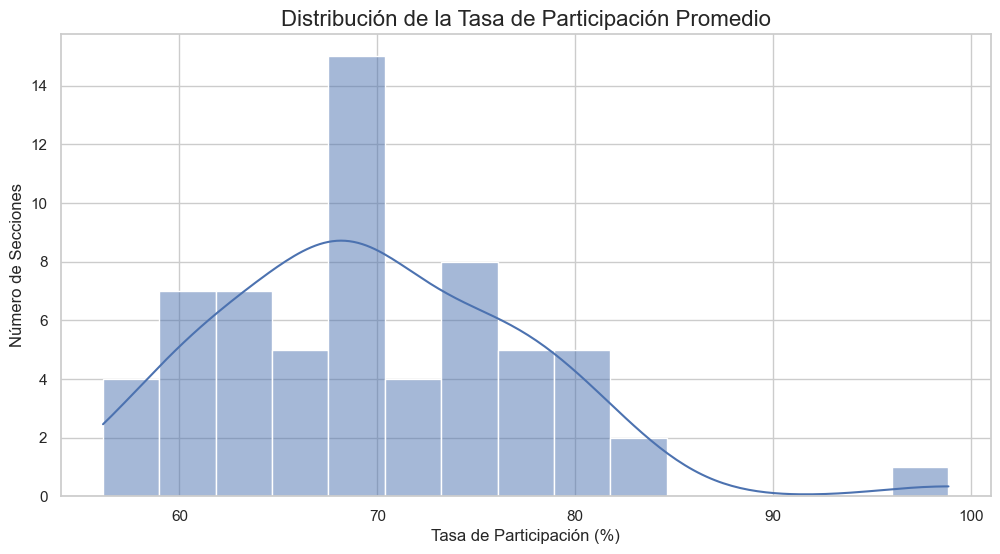

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(gdf['tasa_participacion_promedio'], kde=True, bins=15)
plt.title('Distribución de la Tasa de Participación Promedio', fontsize=16)
plt.xlabel('Tasa de Participación (%)')
plt.ylabel('Número de Secciones')
plt.show()

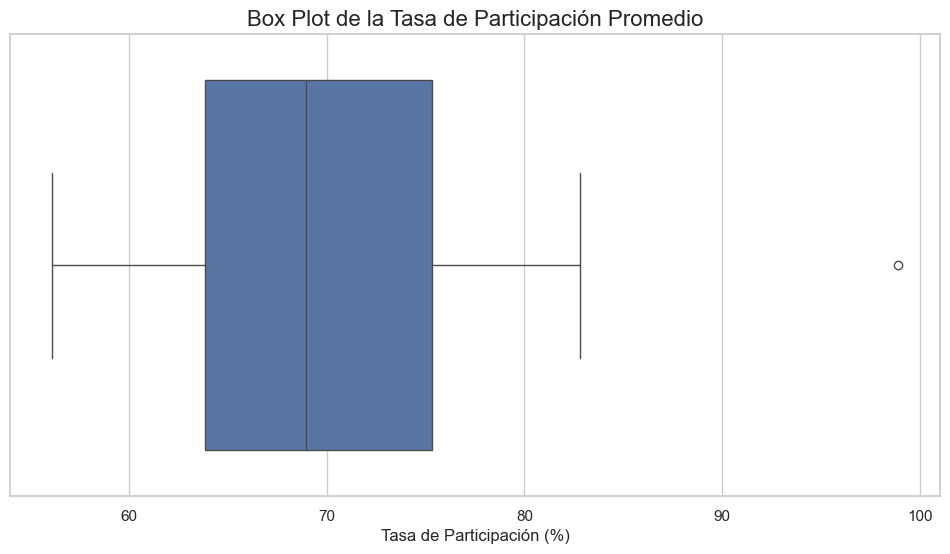

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=gdf['tasa_participacion_promedio'])
plt.title('Box Plot de la Tasa de Participación Promedio', fontsize=16)
plt.xlabel('Tasa de Participación (%)')
plt.show()

In [5]:
# 1. Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = gdf['tasa_participacion_promedio'].quantile(0.25)
Q3 = gdf['tasa_participacion_promedio'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definir el límite para considerar un valor como atípico
# La fórmula estándar es cualquier valor por encima de Q3 + 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"El límite superior para considerar una participación como atípica es: {limite_superior:.2f}%")

# 3. Filtrar el DataFrame para encontrar esas secciones
secciones_atipicas = gdf[gdf['tasa_participacion_promedio'] > limite_superior]

if not secciones_atipicas.empty:
    print(f"\nSe encontraron {len(secciones_atipicas)} secciones con participación inusualmente elevada:")
    
    # Mostramos no solo el porcentaje, sino los números que lo originaron para el diagnóstico
    display(secciones_atipicas[['seccion', 'lista_nominal_promedio', 'votos_totales_acumulados', 'tasa_participacion_promedio']].sort_values('tasa_participacion_promedio', ascending=False))
else:
    print("\nNo se encontraron valores atípicos de participación según el método IQR.")

El límite superior para considerar una participación como atípica es: 92.52%

Se encontraron 1 secciones con participación inusualmente elevada:


,seccion,lista_nominal_promedio,votos_totales_acumulados,tasa_participacion_promedio
46,247,151.425,5989,98.86101
